# Proyecto Módulo 2: Buffon's needle (Aguja de Buffon).

## Integrantes:
- Maximiliano Jiménez Ramírez
- Daniel Sánchez López


## Motivación de la elección del tema para el proyecto.

Nosotros como equipo escogimos el tema de la aguja de Buffon debido a que fue un tema que nos llamó la atención al leer libros sobre integración Monte Carlo y finanzas. Desde el principio decidimos enfocar el proyecto para utilizar la integración Monte Carlo, y para encontrar una aplicación de Monte Carlo a las finanzas buscamos libros en la Biblioteca Dr. Jorge Villalobos Padilla S.J. ubicada dentro del campus ITESO. 

Al leer los libros y revisar las aplicaciones propuestas por los autores tuvimos complicaciones para entender los modelos y las ecuaciones con las que se incorporaba el método de integración de Monte Carlo, ya que usaban temas que no hemos visto hasta el momento, como métodos numéricos. 

Sin embargo en el libro *Handbook in Monte Carlo Simulation: Applications in Financial Engineering, Risk Management, and Economics* del autor *Paolo Brandimarte*, uno de los temas encontramos el problema de la aguja de Buffon, el cual se nos hizo más sencillo la comprensión del problema, y este es nuestra propuesta de proyecto, sobre todo para evitar incongruencias dentro de la solución del proyecto. 

Al final vamos a explicar como nosotros podemos relacionar el proceso involucrado en el problema de la aguja de Buffon con problemas aplicados a las finanzas, específicamente problemas que resuelva la ingeniería financiera.

## Objetivo general:

**Origen**: La aguja de Buffon es un clásico problema de probabilidad geométrica, de realización práctica y cuyo interés radica en que es un método fácil para ir aproximando el valor del número $ \pi $ a partir de sucesivos intentos. Fue planteado por el naturalista francés Buffon en 1733 y reproducido por él mismo ya resuelto en 1777.

El objetivo de este proyecto es utilizar el método de Integración Monte Carlo para dos fines: 
> - Aproximar el valor de $\pi$ a utilizando $N$ cantidad de simulaciones.  
> - Calcular la probabilidad de que una aguja lanzada aleatoriamente al plano cruce una línea.

Al final en las conclusiones mencionaremos en que escenarios o situaciones se pueden aplicar estas dos soluciones del problema al mundo de las finanzas.

## Objetivos específicos del proyecto:

> - Para la realización de los objetivos generales del proyecto previamente mencionados, se necesitarán las siguientes librerías; `numpy` , `pandas` , `matplotlib.pyplot` , `scipy.stats`.
> - Se aproximará el valor de $\pi$ utilizando integración Monte Carlo tipo 1.
> - Se aproximará la probabilidad de que una aguja cruce una línea.
> - Se graficarán los resultados obtenidos.
> - Análisis de los resultados en la conclusión.

---

## Modelo que representa el problema.

Tenemos que el planteamiento del problema es el siguiente: se lanza una aguja de longitud $l$ lanzada sobre un plano segmentado por líneas paralelas separadas $t$ unidades.

Supuestos: Sea $x$ la distancia entre el centro de la aguja y la línea más cercana $x [0, \frac{t}{2}] $ y sea $\theta$ el ángulo entre la aguja y las líneas $\theta [0, \frac{\pi}{2}]$. También es importante hacer ver que esta solución es para el caso cuando $t > l$ (las agujas miden menos que la distancia entre las líneas).

La variable aleatoria $x$ se distribuye uniformemente (de forma continua) entre el $0$ y $\frac{t}{2}$, por lo que su función de densidad es la siguiente: $f(x) = \frac{2}{t} dx $

La variable aleatoria $\theta$ también se distribuye uniformemente entre $0$ y $\frac{\pi}{2}$, por lo que su función de densidad de dendidad es: $f(\theta) = \frac{2}{\pi} d\theta$

Como $x$ y $\theta$ son variables aleatorias independientes, la función conjunta de densidad es el producto de ambas: $f(x, \theta) = \frac{4}{t \pi} dx d\theta $

La condición de que una aguja cruce una línea es de $x \geq \frac{l}{2} \sin{\theta} $

El modelo o la función de densidad / probabilidad que respresenta la estimación de $\pi$ es el siguiente:

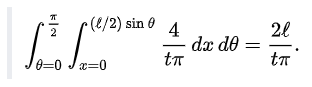

Como vemos esta ecuación se complicaría un poco si queremos resolver el problema creando una función de Montecarlo tipo 2, tal cual como vimos en clase, pero al observar el resultado de la integral, vemos que podemos despejar $\pi$ del resultado, así que tenemos:

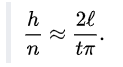

Donde tenemos que:
> - $n$: se lanzan $n$ agujas
> - $h$: $h$ agujas cruzan una de las líneas
> - $l$: longitud de la aguja lanzada
> - $t$: distancia entre las líneas

Despejando $\pi$ tenemos que:

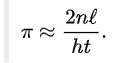

---

## Solución del problema de optimización.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random

In [3]:
def bernoulli1(x) :
    return ( 1/2*np.sin(x) )

In [4]:
def montecarlo2(f, N, a, b) :
    u = np.random.uniform(a, b, N)
    return np.mean(f(u))*(b-a) 

In [5]:
d1 = montecarlo1(bernoulli1, 10000, 0, (np.pi/2))

In [11]:
Pi = 2/d1
Pi

4.009317202852018

In [177]:
K = np.logspace(1, 7, 7)
table = pd.DataFrame(columns = ['Simulación Pi'], index = K)

for i in K :
    table.loc[i, 'Simulación Pi'] = 2/(montecarlo1(bernoulli1, int(i), 0, (np.pi/2)))
table

,Simulación Pi
10.0,3.707224
100.0,3.984631
1000.0,3.965009
10000.0,4.003006
100000.0,4.003854
1000000.0,3.997008
10000000.0,3.99957


In [63]:
l = np.random.uniform(0, 7)
t = np.random.uniform(0, 10)

def bernoulli2(t):
    return ( 4/(t*np.pi) )

def montecarlo2(region, ax, bx, ay, by, N) :
    x = np.random.uniform(ax, bx, N)
    y = np.random.uniform(ay, by, N)
    B = region(x, y)
    AR = (bx - ax) * (by - ay)
    return np.mean(B)*AR

Es complicado resolver el problema de Monte Carlo con el método con el cual trabajamos en clase.

A continuación vamos a utilizar el método de `Monte Carlo` para estimar el valor de pi, pero no utilizando una función como con las que trabajamos en clase, si no con ciclos, definiendo las variables que vamos a necesitar para aproximar el valor de $\pi$ y también la probabilidad de que la aguja lanzada si cruce una de las líneas, utilizando intervalos de confianza de 90%, 95% y 99%.

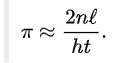

Importamos las librerías que vamos a utilizar para esta sección del proyecto.

In [16]:
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import pandas as pd

Primero definimos las variables importantes para el problema de la aguja de Buffon, las cuales son las siguientes:
> - *line_width*: El ancho de la línea $t$
> - *needle_length*: La longitud de la aguja $l$

Para esta primera sección de la resolución del problema, se van a fijar los valores de estas variables a valores fijos, ya que antes hicimos pruebas con distribuciones uniformes, pero los resultados son inconsistentes. Así que vamos a fijar valores para estas variables.

Después en la misma celda definimos una función que va a "lanzar" una aguja al azar, la cuál va a genearar una aguja del tamaño aleatorio seleccionado al espacio entre las líneas. Dentro de la función definimos las siguientes variables:
> - *d*: Es una variable que representa la distancia entre el centro de la aguja hasta la línea más cercana a la posición de dicha aguja, esta distancia se puede extraer de una distrubución uniforme entre 0 y el ancho de la línea más cercana dividido enrtre dos. Técnicamente es la distancia que hay entre dos líneas.
> - *theta*: Es el valor del ángulo agudo, también este ángulo se puede extraer de una distribución uniforme entre 0 y $ \frac{\pi}{2} $.

Lo que va a hacer dicha función es lanzar la aguja y nos va a regresar si dicha aguja cruzó una de las líneas o no, y va a regresar el resultado del evento como dato booleano; **True** o **False**.

Para determinar si la aguja cruzó o no la línea, va a hacer el cálculo de dos parámetros. Si la distancia del centro de la aguja ***d*** a la línea más cercana es **menor que** la mitad de la longitud de la aguja por el seno del angulo ***theta***, la aguja si cruzó la línea.

In [43]:
line_width = 3
needle_length = 2.5

def needle_drop() :
    d = np.random.uniform(0, line_width/2)
    theta = np.random.uniform(0, np.pi/2)
    
    if d < needle_length/2*np.sin(theta) :
        return True
    else : 
        return False

Utilizamos el método Monte Carlo para determinar o calcular la probabilidad de que la función que lanza la aguja `needle_drop()` regrese un valor verdadero o True, que es la probabilidad de que la aguja cruce una línea. 

Utilizamos la función de `numpy.random.seed` para establecer la semilla aleatoria en un valor fijo para poder obtener resultados consistentes.

Para realizar el método Monte Carlo vamos a utilizar un ciclo for, el cúal va a operar con los siguientes parámetros:
> -  *N*: n cantidad de términos o de veces que se va a lanzar la aguja.
> - *observations*: va a generar un arreglo de numpy de ceros, o una matriz, usando la función `numpy.zeros`, de tamaño o longitud del número de términos $N$.


La manera en la que esta simulación Monte Carlo, utilizando el ciclo *for* es la siguiente:
> El ciclo va a iterar la función de `needle_drop()` $N$ cantidad de veces, que es la cantidad de agujas que se lanzan, y va ir guardando los resultados, que son **True** o **False** en la matriz de ceros, como dato númerico los resultados serán unos y ceros ya que estamos utilizando un arreglo de `numpy` que maneja datos numéricos.

> Una vez terminado el ciclo, definimos la variable *mean_estimate* que va a guardar el promedio o el número esperado cuando la aguja cruza una línea. Para esto utilizamos la función `numpy.average`. Para poder graficar después todas las probabilidades de que la aguja cruce la línea, en la misma variable *mean_estimate* vamos a guardar en arreglo matricial los promedios mientras se va iterando el ciclo de la manera *[np.average(observations[0:j]) for j in range(N)]*.

In [102]:
np.random.seed(16)

N = 1000

observations = np.zeros(N)

for j in range(N) :
    observations[j] = needle_drop()
    
mean_estimate = [np.average(observations[0:j]) for j in range(N)]

C:\Users\Daniel\anaconda3\lib\site-packages\numpy\lib\function_base.py:380: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis)
C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


In [103]:
mean_estimate

[nan,
 1.0,
 0.5,
 0.3333333333333333,
 0.25,
 0.4,
 0.3333333333333333,
 0.2857142857142857,
 0.375,
 0.3333333333333333,
 0.4,
 0.45454545454545453,
 0.4166666666666667,
 0.38461538461538464,
 0.35714285714285715,
 0.4,
 0.4375,
 0.47058823529411764,
 0.5,
 0.5263157894736842,
 0.5,
 0.5238095238095238,
 0.5454545454545454,
 0.5217391304347826,
 0.5416666666666666,
 0.52,
 0.5,
 0.48148148148148145,
 0.4642857142857143,
 0.4827586206896552,
 0.4666666666666667,
 0.4838709677419355,
 0.5,
 0.48484848484848486,
 0.5,
 0.5142857142857142,
 0.5277777777777778,
 0.5135135135135135,
 0.5,
 0.5128205128205128,
 0.525,
 0.5121951219512195,
 0.5238095238095238,
 0.5348837209302325,
 0.5227272727272727,
 0.5333333333333333,
 0.5217391304347826,
 0.5106382978723404,
 0.5,
 0.4897959183673469,
 0.48,
 0.49019607843137253,
 0.4807692307692308,
 0.49056603773584906,
 0.5,
 0.4909090909090909,
 0.5,
 0.5087719298245614,
 0.5172413793103449,
 0.5084745762711864,
 0.5166666666666667,
 0.5245901639344

A continuación codificamos los intervalos de confianza de 90%, 95% y 99% utilizando la librería de `scipy.stats`, con las funciones de `stats.sem` que calcula el error estándar de la media de las observaciones, y la función `stats.norm.ppf` que obtiene la distribución normal de nuestro valor de confianza, pero es una función de distribución acumulativa inversa de 1 menos el valor de confianza.

Y para finalizar hacemos cada una de las gráficas.

**Gráfica de probabilidades con un intervalo de confianza de 90%**

In [104]:
# Intervalo de confianza 90%
significance90 = 0.1
z_crit90 = stats.norm.ppf(1 - (significance90/2))
confidence_int90 = [ z_crit90*stats.sem(observations[0:j]) for j in range(N) ]

C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


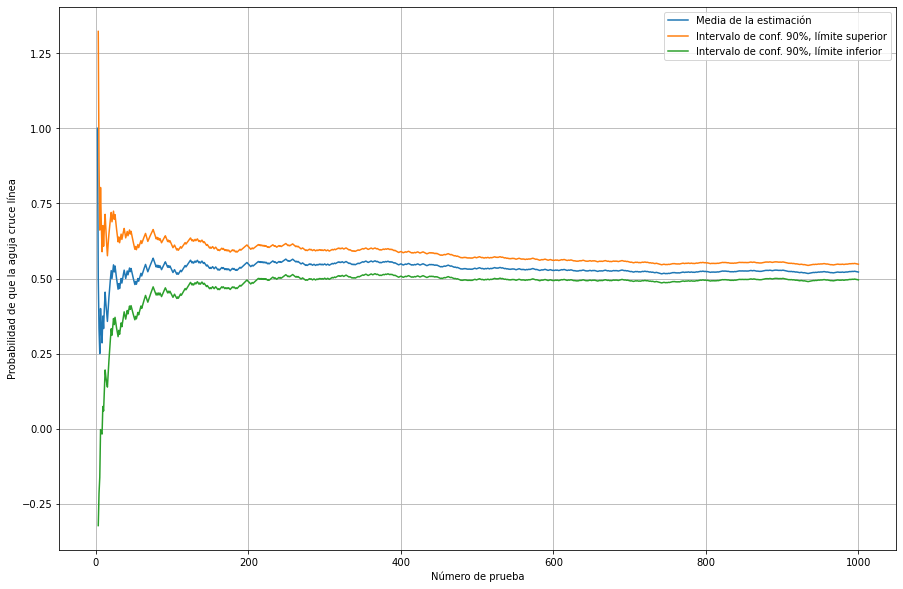

In [105]:
f0 = plt.figure()
plt.plot(np.arange(N) + 1, mean_estimate, label = 'Media de la estimación')
plt.plot(np.arange(N) + 1, np.add(mean_estimate, confidence_int90), label = 'Intervalo de conf. 90%, límite superior')
plt.plot(np.arange(N) + 1, np.subtract(mean_estimate, confidence_int90), label = 'Intervalo de conf. 90%, límite inferior ')
plt.xlabel('Número de prueba')
plt.ylabel('Probabilidad de que la aguja cruce línea')
plt.legend(loc = 'best')
plt.grid()
f0.set_figheight(10)
f0.set_figwidth(15)

**Gráfica de probabilidades con un intervalo de confianza de 95%**

In [106]:
# Intervalo de confianza de 95%
significance95 = 0.05
z_crit95 = stats.norm.ppf(1 - significance95/2)
confidence_int95 = [ z_crit95 * stats.sem(observations[0:j]) for j in range(N) ]

C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


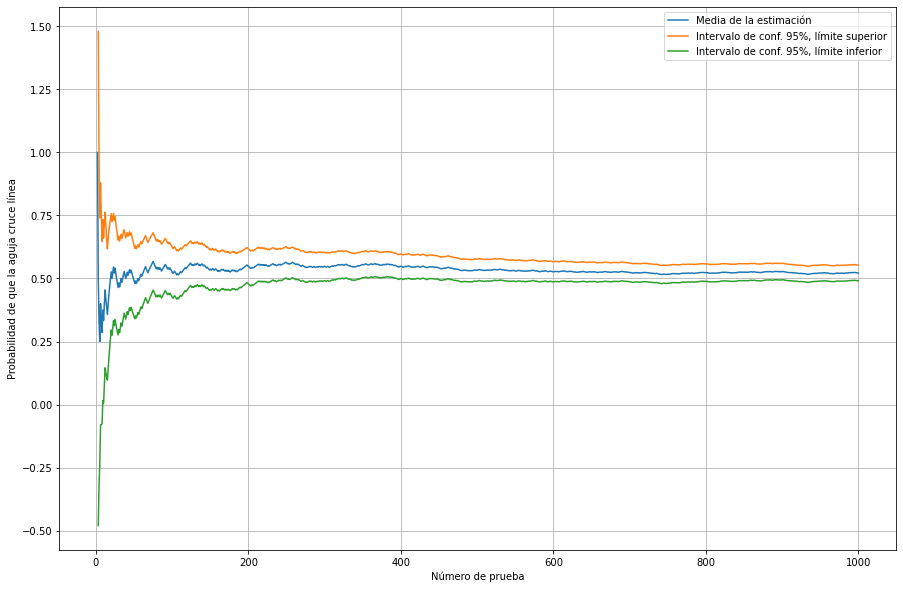

In [107]:
f1 = plt.figure()
plt.plot(np.arange(N) + 1, mean_estimate, label = 'Media de la estimación')
plt.plot(np.arange(N) + 1, np.add(mean_estimate, confidence_int95), label = 'Intervalo de conf. 95%, límite superior')
plt.plot(np.arange(N) + 1, np.subtract(mean_estimate, confidence_int95), label = 'Intervalo de conf. 95%, límite inferior ')
plt.xlabel('Número de prueba')
plt.ylabel('Probabilidad de que la aguja cruce línea')
plt.legend(loc = 'best')
plt.grid()
f1.set_figheight(10)
f1.set_figwidth(15)

**Gráfica de probabilidades con un intervalo de confianza de 99%**

In [108]:
# Intervalo de confianza de 99%
significance99 = 0.01
z_crit99 = stats.norm.ppf(1 - (significance99/2))
confidence_int99 = [ z_crit99*stats.sem(observations[0:j]) for j in range(N) ]

C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
C:\Users\Daniel\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


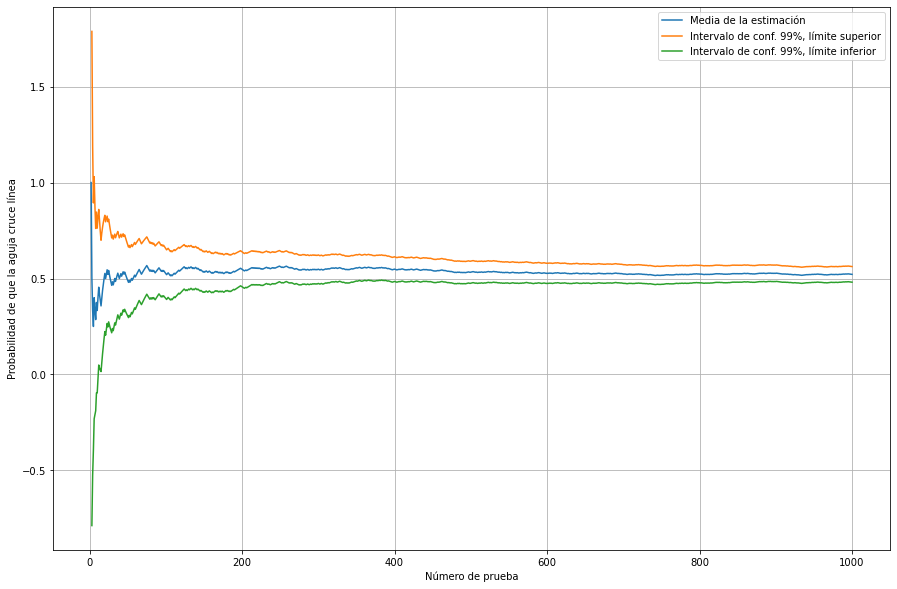

In [109]:
f2 = plt.figure()
plt.plot(np.arange(N) + 1, mean_estimate, label = 'Media de la estimación')
plt.plot(np.arange(N) + 1, np.add(mean_estimate, confidence_int99), label = 'Intervalo de conf. 99%, límite superior')
plt.plot(np.arange(N) + 1, np.subtract(mean_estimate, confidence_int99), label = 'Intervalo de conf. 99%, límite inferior ')
plt.xlabel('Número de prueba')
plt.ylabel('Probabilidad de que la aguja cruce línea')
plt.legend(loc = 'best')
plt.grid()
f2.set_figheight(10)

f2.set_figwidth(15)

---

Ahora vamos a estimar el valor de $\pi$.

Prácticamente en este punto ya conocemos las siguientes variables:
> - $n$: se lanzan $n$ agujas = N
> - $l$: longitud de la aguja lanzada = needle_length
> - $t$: distancia entre las líneas = line_with

Ahora tenemos que obtener la variable $h$ que es la cantidad de agujas que cruzaron una línea.

Tenemos que, según nuestra funcíon que lanza las agujas *needle_drop()* nos regresa un valor True o False.

Como cada resultado obtenido de la función dentro de cada iteración del ciclo de Monte Carlo lo va agregando a una matriz de `numpy` los va a agregando como $1$ o $0$.

Imprimimos nuestra variable de observaciones *observations* para comprobar esto.

In [110]:
observations

array([1., 0., 0., 0., 1., 0., 0., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 1., 0., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1.,
       0., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 1., 0., 1., 0., 1., 0., 0.,
       1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0.,
       1., 1., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 0., 0., 1., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0.,
       1., 0., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 1., 0., 1., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 0., 1., 0.

Ahora para obtener la cantidad de agujas que cruzaron una línea, que son cada $1$ dentro de la matriz, podemos sacar un promedio de las observaciones, o también con la función de `numpy.count_nonzero` ya que la matriz se compone de unos y ceros y solo nos importan los unos.

In [111]:
np.average(observations)

0.521

In [112]:
c = np.count_nonzero(observations)
c

521

Utilizamos el resultado de la integral original del planteamiento del problema, para estimar el valor de $\pi$ ya con las variables obtenidas.
> - $n$: se lanzan $n$ agujas = N
> - $h$: $h$ agujas cruzan una de las líneas = c
> - $l$: longitud de la aguja lanzada = needle_length
> - $t$: distancia entre las líneas = line_with

Y evaluamos para obtener un valor aproximado de $\pi$

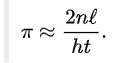

In [113]:
Pi =(2*needle_length*N)/(c*line_width)
Pi

3.198976327575176

## Resultados.

Se logra estimar el valor de $\pi$

## Conclusiones.

En base a los objetivos planteados al principio del proyecto, y con los resultados obtenidos, podemos observar que el método de integración Monte Carlo efectivo cuando queremos aproximar algún valor, probabilidad, o un valor esperado que se quiera obtener a base de iterar $N$ veces un evento, teniendo una distribución uniforme y parámetros definidos.

**Relación con finanzas**
Como mencionamos en los objetivos del proyecto, y en base a los resultados obtenidos, la integración Montecarlo es útil para valorar proyectos empresariales y de inversión, riesgos, volatilidad, procesos estocásticos, valuación de activos financieros, así como la modelación y simulación de estos eventos. 

Como podemos observar en la estimación de la probabilidad de que una aguja cruzara la línea, hay un componente de probabilidad que se basa en estimaciones, y cuantas más proyecciones hagamos, más preciso será el resultado estimado. Y el resultado obtenido se basa en grados de confianza, obtenemos un resultado y una probabilidad de acierto, que fue lo que se utilizó en la solución del problema de la Aguja de Bufón.

Entonces, este problema clásico de geometría nos permite identificar las posibles aplicaciones que tiene el método de integración o de simulación Monte Carlo para problemas de ingeniería en general.


## Referencias

Para la planeación y elaboración del presente proyecto, nos apoyamos de los siguientes libros de la biblioteca ITESO

- Kahl, C. (2008). *Modelling and simulation of stochastic volatility in finance*. Dissertation.


- Brandimarte, P. (2014). *Handbook in Monte Carlo Simulation: Applications in Financial Engineering, Risk Management, and Economics*. Wiley.


- *https://es.wikipedia.org/wiki/Aguja_de_Buffon*
